# Tarea 1
Durante los últimos 65 años, la población en México ha crecido poco más de cuatro veces. En 1950 había 25.8 millones de personas y en 2015 la población llegó a 119.5 millones.
La tabla siguiente muestra la población de nuestro país en el período de 1950 a 2015 de acuerdo al Instituto Nacional de Estadística y Geografía (INEGI).

|1950|1960|1970|1980|1990|2000|2010|2015|
|----|----|----|----|----|----|----|----|
|25.8|34.9|48.2|66.8|81.2|97.5|112.3|119.5|

### Actividades a realizar
1. Establecer un modelo de crecimiento poblacional basado en el Modelo Logístico utilizando los datos de 3 distintos años de la tabla.
2. Crear una tabla para comparar la población real con los valores pronosticados por el modelo.
3. Calcular del porcentaje de error para cada par de datos.
4. Dar una conclusión acerca del modelo propuesto y su efectividad.


Modelo logístico:

### $\frac{dP}{dt} = kP(1-\frac{P}{K})$

- `P(t)` representa la cantidad de población o la variable de interés en el tiempo t,
- `K` se le conoce como la barrera poblacional o capacidad de carga, es decir, es la máxima población sostenida por el ambiente,
- `k` es la tasa de crecimiento y representa la tasa intrínseca de crecimiento de la población cuando la población es pequeña y no hay limitaciones de recursos.

Integrando por fracciones parciales, obtenemos:

### $P(t) = \frac{K}{1+Ce^{-kt}}$

Para ejecutar este modelo en Python, primero vamos a importar datos, para crear el modelo de crecimiento, se escogieron los datos de los años 1950, 1970 y 2010

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = {'fecha': [1950, 1970, 2010],
        'poblacion': [25.8, 48.2, 112.3]}

df = pd.DataFrame(data)
df

,fecha,poblacion
0,1950,25.8
1,1970,48.2
2,2010,112.3


A continuación, se hará la definición de la función logística, cambiaremos la variable k (minúscula) por la variable r, para ejecutar correctamente el código. De igual manera, usaremos

### $P(t) = \frac{K}{1 + Ae^{-rt}}$

Se evalúa una condición inicial y despejamos A

### $P(0) = P0 = \frac{K}{1 + A}$

### $A = \frac{K}{P_0}-1$

Sustituimos en la ecuación logística
### $P(t) = \frac{K}{1 + (\frac{K}{P0} - 1)e^{-rt}}$

Despejando obtenemos

### $P(t) = \frac{K}{1+e^{-r(t-P_0)}}$

Esta ecuación será la que utilicemos dentro del modelo de Python

In [2]:
def funcion_logistica(t, K, r, P0):
  """
  Args:
    t: tiempo (años)
    K: capacidad de cargar
    r: tasa de crecimiento
    P0: población inicial
  """
  return K / (1 + np.exp(-r * (t - P0)))

Lo siguiente será crear una función para encontrar los valores óptimos de los parámetros del modelo ($K$, $r$ y $P_0$).

Esta función tomará de entrada el dataframe creado con los datos y los dividirá en fecha y población en xdata e ydata respectivamente.

Lo siguiente sería establecer valores iniciales de $K$, $r$ y $P_0$ como una estimación inicial, para posteriormente usar la función curve_fit de scipy que realiza el ajuste no lineal, esta función compara las predicciones del modelo logístico con los datos reales y ajusta los parámetros para que se minimice el error. Esto devolvera los parametros optimizados.

In [17]:
def optimizar_valores(df):

  xdata = df['fecha']
  ydata = df['poblacion']

  p0 = [150, 0.03, 1950]

  p_opt, pcov = curve_fit(funcion_logistica, xdata, ydata, p0=p0)

  return p_opt

# Fit the model
params = optimizar_valores(df)
K, r, P0 = params
print(K)
print(r)
print(P0)

170.82067130358314
0.039638260255862166
1993.5564474803411


/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_5683/1159382986.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  p_opt, pcov = curve_fit(funcion_logistica, xdata, ydata, p0=p0)


Sustituyendo los datos obtenidos en el modelo inicial, queda:

### $P(t) = \frac{170.82}{1+e^{-0.0396(t-1993.55)}}$

Si evaluamos para varios casos, obtenemos:

In [26]:
test = funcion_logistica(1950, *params)
print("Poblacion en 1950: %s" % test)

test = funcion_logistica(1990, *params)
print("Poblacion en 1990: %s" % test)

test = funcion_logistica(2010, *params)
print("Poblacion en 2010: %s" % test)

test = funcion_logistica(2015, *params)
print("Poblacion en 2015: %s" % test)

Poblacion en 1950: 25.800000000000043
Poblacion en 1990: 79.40007890581573
Poblacion en 2010: 112.30000000000007
Poblacion en 2015: 119.67081620783293


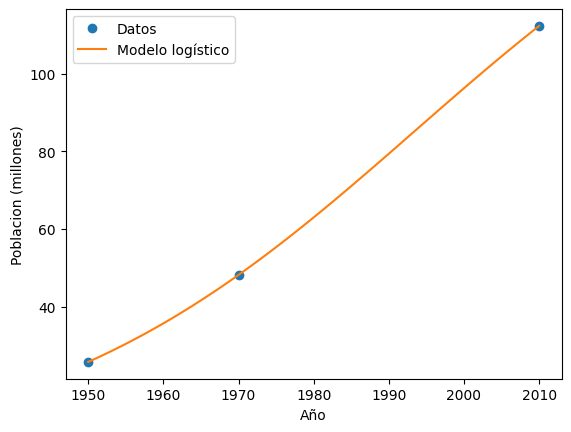

In [27]:
def graficar_modelo(df, params):

  xdata = df['fecha']
  ydata = df['poblacion']

  t = np.linspace(xdata.min(), xdata.max(), 100)
  y_pred = funcion_logistica(t, *params)

  plt.plot(xdata, ydata, 'o', label='Datos')
  plt.plot(t, y_pred, '-', label='Modelo logístico')
  plt.xlabel('Año')
  plt.ylabel('Poblacion (millones)')
  plt.legend()
  plt.show()

# Plot the results
graficar_modelo(df, params)
